# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных:**
<p>Name — название игры
<p>Platform — платформа
<p>Year_of_Release — год выпуска
<p>Genre — жанр игры
<p>NA_sales — продажи в Северной Америке (миллионы проданных копий)
<p>EU_sales — продажи в Европе (миллионы проданных копий)
<p>JP_sales — продажи в Японии (миллионы проданных копий)
<p>Other_sales — продажи в других странах (миллионы проданных копий)
<p>Critic_Score — оценка критиков (максимум 100)
<p>User_Score — оценка пользователей (максимум 10)
<p>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Цель исследования:** Анализ данных о продажах компьютерных игр в интернет-магазине "Стримчик" с целью выявления закономерностей, определяющих успешность игр. На основе полученных результатов планировать рекламные кампании и сделать прогноз на 2017 год.

**Ход исследования:**

**1. Импортирование данных:** Открывается файл с данными и изучается общая информация. 

**2. Предварительный анализ данных:**

1. Названия столбцов приводятся к нижнему регистру.
2. Преобразуются данные в нужные типы: например, столбец Year_of_Release должен иметь тип данных "год", столбец User_Score - тип данных "оценка пользователей".
3. Обрабатываются пропуски, при необходимости заполняются определенным образом или оставляются без изменений. Причины пропусков анализируются.
4. Обрабатывается значение 'tbd' в столбце с оценкой пользователей.

**3. Исследовательский анализ данных:**

1. Анализируется количество выпущенных игр в разные годы, определяется важность данных за все периоды.
2. Изучается изменение продаж по платформам, выбираются платформы с наибольшими суммарными продажами, строится распределение по годам. Определяется характерный срок появления новых и исчезновения старых платформ.
3. Выбирается актуальный период данных для прогнозирования на 2017 год.
4. Определяются лидирующие по продажам платформы, анализируется их динамика. Выбираются потенциально прибыльные платформы.
5. Строится график "ящик с усами" по глобальным продажам игр в разбивке по платформам для оценки распределения.
6. Анализируется влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы. Строится диаграмма рассеяния и вычисляется корреляция между отзывами и продажами. Формулируются выводы и сравниваются с продажами игр на других платформах.
7. Анализируется общее распределение игр по жанрам, выявляются самые прибыльные жанры, анализируются жанры с высокими и низкими продажами.

**4. Составляются портреты пользователей каждого региона:**

1. Определяются самые популярные платформы в регионах NA, EU, JP. Анализируются различия в долях продаж.
2. Определяются самые популярные жанры в регионах NA, EU, JP. Поясняются различия.
3. Анализируется влияние рейтинга ESRB на продажи в отдельных регионах.

**5. Проверка гипотез.**

**6. Общий вывод:**
Формулируется общий вывод на основе полученных результатов и проведенного анализа данных.

# 1. Загрузка данных

In [1]:
#Загружаем библиотеки.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    print('Проверьте путь к датасету!')

In [3]:
print('Первый десять строк из data:')
display(data.head(10))
print('\nИнформация о data:\n')
print(data.info())

Первый десять строк из data:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN




Информация о data:



<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16715 entries, 0 to 16714

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   Name             16713 non-null  object 

 1   Platform         16715 non-null  object 

 2   Year_of_Release  16446 non-null  float64

 3   Genre            16713 non-null  object 

 4   NA_sales         16715 non-null  float64

 5   EU_sales         16715 non-null  float64

 6   JP_sales         16715 non-null  float64

 7   Other_sales      16715 non-null  float64

 8   Critic_Score     8137 non-null   float64

 9   User_Score       10014 non-null  object 

 10  Rating           9949 non-null   object 

dtypes: float64(6), object(5)

memory usage: 1.4+ MB

None


1. В датафрейме содержится 16715 строк.
2. При выводе таблицы замечены пропуски.
3. Название стобцов нужно привести к нижнему регистру.
4. Заменить тип данных: 1) Year_of_Release - с float64 на int64, 2) User_Score - c оbject на float64.

In [4]:
#Выводим долю пропусков.
pd.DataFrame(round(data.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
Critic_Score,51.300000
Rating,40.500000
User_Score,40.100000
Year_of_Release,1.600000
Name,0.000000
Genre,0.000000
Platform,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000


In [5]:
print('Количество дубликатов в data:', data.duplicated().sum())

print('\nКоличество пропусков:\n', data.isna().sum().sort_values(ascending=False))

Количество дубликатов в data: 0



Количество пропусков:

 Critic_Score       8578

Rating             6766

User_Score         6701

Year_of_Release     269

Name                  2

Genre                 2

Platform              0

NA_sales              0

EU_sales              0

JP_sales              0

Other_sales           0

dtype: int64


In [6]:
#Проверка неявных дубликатов
duplicates = data.duplicated(subset=['Name', 'Platform', 'Year_of_Release'])
num_duplicates = duplicates.sum()
print(f"Количество неявных дубликатов в data: {num_duplicates}")

Количество неявных дубликатов в data: 2


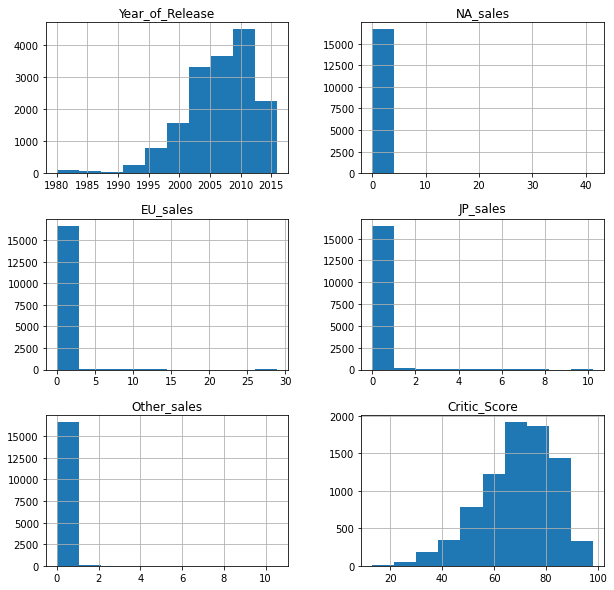

In [7]:
data.hist(figsize=(10, 10))
plt.show()

In [8]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


1. Неявных дубликатов - 2.
2. Явные дубликаты отсутствуют.
3. Доля пропусков: Critic_Score - 51.3% (8578), Rating	- 40.5% (6766), User_Score	- 40.1% (6701), Year_of_Release - 1.6% (269), Name и Genre менее 1% (4).

# 2. Предварительный анализ данных

**1. Приводим столбцы к нижнему регистру**

In [9]:
data.columns = data.columns.str.lower()

#проверяем
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
#Удаление неявных дубликатов
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], inplace=True)

#Проверка после удаления и сохранение изменений в основном датасете
num_duplicates_after_removal = data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()
print(f"Количество неявных дубликатов после удаления: {num_duplicates_after_removal}")

# Сохранение изменений в основном датасете
data = data.copy()

Количество неявных дубликатов после удаления: 0


**2. Заменяем тип данных и удаляем/заменяем пропуски**

year_of_release - заменим пропуски на -1, пропусков в целом мало и на дальнейшие вычисления не повлияет.

In [11]:
#Оценка процента пропущенных значений
missing_percentage = (data['year_of_release'].isna().sum() / len(data)) * 100
print('Процент пропущенных значений в year_of_release:', missing_percentage)

Процент пропущенных значений в year_of_release: 1.6095255190570215


Поставим заглушку на значение года -1, чтобы избавиться от всех пропусков. В дальнейшем при анализе будет отфильтровывать данный столбец.

In [12]:
#Заменяем пропуски на -1 и меняем тип данных.
data['year_of_release'] = data['year_of_release'].fillna(-1)
data['year_of_release'] = data['year_of_release'].astype(int)
#Проверка
print('Тип данных year_of_release:', data['year_of_release'].dtypes)
#Проверка на пропуски.
print('\nКоличество пропусков в year_of_release:', data['year_of_release'].isna().sum())

Тип данных year_of_release: int64



Количество пропусков в year_of_release: 0


Удалим пропуски в name и genre, их количество крайне мало.

In [13]:
#Удаление пропусков
data = data.dropna(subset = ['name', 'genre'])
#Проверка
print('Количество пропусков в name:', data['name'].isna().sum())
print('\nКоличество пропусков в genre:', data['genre'].isna().sum())

Количество пропусков в name: 0



Количество пропусков в genre: 0


Замена пропусков в столбцах critic_score.

In [14]:
#Заменим пропуски в critic_score на -1.
#Изменим тип данных на с float int.
data['critic_score'] = data['critic_score'].fillna(-1).astype(int)
print('\nКоличество пропусков в critic_score:', data['critic_score'].isna().sum())
print('Проверка типа данных в critic_score:', data['critic_score'].dtype)



Количество пропусков в critic_score: 0

Проверка типа данных в critic_score: int64


'tbd' обозначает аббревиатуру "To Be Determined", то означает, что значение еще не определено или неизвестно. Можно просто заменить значение "tbd" - "to be determined" на 100 и поменять тип данных на float.

In [15]:
#Заменяем на NaN и меняем тип данных на float.
data['user_score'] = data['user_score'].replace('tbd', 100)
data['user_score'] = data['user_score'].fillna(100).astype(float)
#Проверка
print('Тип данных в user_score:', data['user_score'].dtype)

Тип данных в user_score: float64


In [16]:
#Проверка на кол-во пропусков
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

Теперь можно приступать к работе

In [17]:
#Суммарные продажи во всех регионах.
data['total_sales'] = data[['na_sales', 'eu_sales' , 'jp_sales', 'other_sales']].sum(axis=1)
#Проверка на добавление столбца
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,100.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,100.0,NaN,31.38


1. Пропуски могли возникнуть по причине сбоя в процессе обработки данных.
2. Заменили пропуски user_score и critic_score, затем заменили тип данных.
3. Удалили пропуски в genre и name.
4. Создали отдельный столбец total_sales, где разместили расчет суммарных продаж во всех регионах.

# 3. Исследовательский анализ данных:

**1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

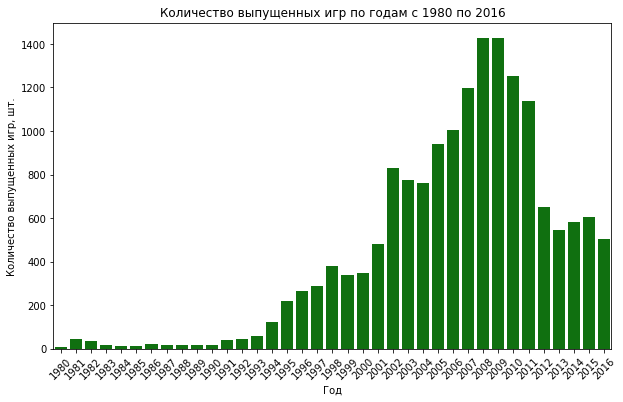

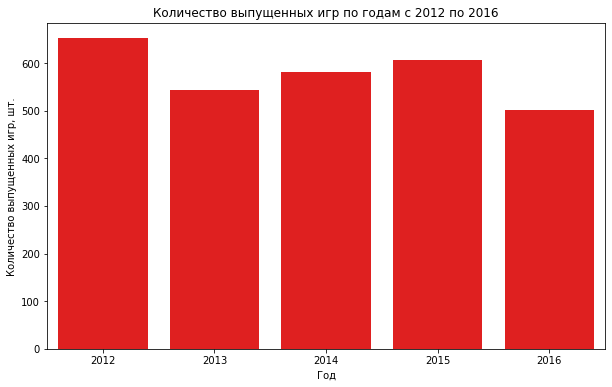

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data[((data['year_of_release'] >= 1980) & (data['year_of_release'] <= 2016))]['year_of_release'].value_counts().sort_index().index, 
            y=data[((data['year_of_release'] >= 1980) & (data['year_of_release'] <= 2016))]['year_of_release'].value_counts().sort_index().values, 
            color='green')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр, шт.')
plt.title('Количество выпущенных игр по годам с 1980 по 2016')
plt.xticks(rotation=45)

plt.figure(figsize=(10, 6))
sns.barplot(x = data[((data['year_of_release'] >= 2012) & (data['year_of_release'] <= 2016))]['year_of_release'].value_counts().index, 
            y = data[((data['year_of_release'] >= 2012) & (data['year_of_release'] <= 2016))]['year_of_release'].value_counts().values,
           color='red')
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр, шт.')
plt.title('Количество выпущенных игр по годам с 2012 по 2016')
plt.show()

1. На графике четко видно, как количество выпуска игр резко спал в период с 2011 по 2012. 
2. Самый пик выпуска игр был с 2008 по 2009 год.
3. Выпуск игр с 2012 по 2016 происходил почти в одном и том же интервале. 

**2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

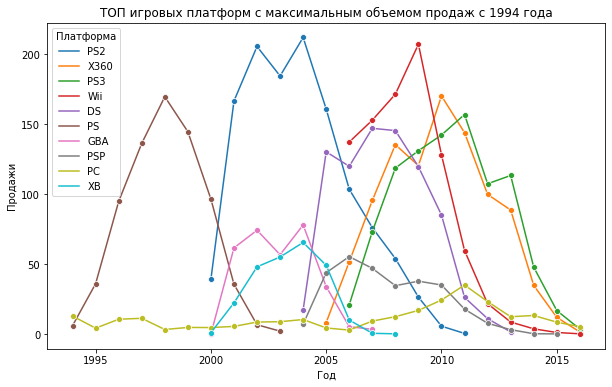

In [20]:
top_platforms = data['platform'].value_counts().head(10).index

top_platforms_data = data[data['platform'].isin(top_platforms)]
top_platforms_data = top_platforms_data[top_platforms_data['year_of_release'] >= 1994]

sales_by_year = top_platforms_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

order = top_platforms_data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).index
sales_by_year['platform'] = pd.Categorical(sales_by_year['platform'], categories=order, ordered=True)
sales_by_year_sorted = sales_by_year.sort_values(by=['platform', 'year_of_release'])

plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_year_sorted, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('ТОП игровых платформ с максимальным объемом продаж с 1994 года')
plt.legend(title='Платформа', loc='upper left')
plt.show()

In [21]:
def top_platforms_years(data, year):
    data_sorted = data[data['year_of_release'] >= year]
    top = data_sorted.groupby('platform')['total_sales'].sum().nlargest(10)
    return top

top_of_1994 = top_platforms_years(data, 1994)
print("Объем продаж с 1994 года:\n", top_of_1994)

temp = data[data['year_of_release'] != -1].copy()
time_life = temp.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1
median_lifespan = time_life['life'].median()
print(f"\nМедианный срок жизни платформы: {median_lifespan} год(а/ов)")

Объем продаж с 1994 года:

 platform

PS2     1233.56

X360     961.24

PS3      931.33

Wii      891.18

DS       802.76

PS       727.58

PS4      314.14

GBA      312.88

PSP      289.53

3DS      257.81

Name: total_sales, dtype: float64



Медианный срок жизни платформы: 7.0 год(а/ов)


1. Характерный срок жизни платформы, в течение которого она активно продается, составляет примерно 8-10 лет.
2. Однако стоит отметить, что на графике не отображаются ожидаемые всплески новых платформ в 2014-2016 годах. Вероятно, это связано с тем, что мы анализируем только топ-10 платформ по историческим данным, и новые платформы, которые появились в этом периоде, могут не попасть в этот топ-10.
<p> Для более детального анализа и планирования на 2017 год, необходимо построить график объемов продаж игр по всем платформам за актуальный период. Это позволит увидеть актуальные тренды и выявить потенциально прибыльные платформы для последующего прогнозирования и планирования.

**3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

**Не учитывайте в работе данные за предыдущие годы.**

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

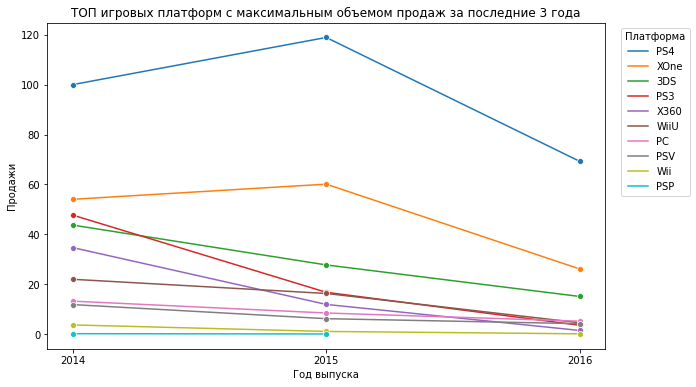

In [23]:
#Получение данных за последние 3 года
current_year = data['year_of_release'].max()
years_x = data[data['year_of_release'] >= current_year - 2]

#Получение топ-10 платформ
top_platforms = years_x['platform'].value_counts().head(10).index
top_platforms_data = years_x[years_x['platform'].isin(top_platforms)]

#Группировка данных по годам и платформам
sales_by_year = top_platforms_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

#Подготовка порядка платформ для легенды
order = top_platforms_data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).index
sales_by_year['platform'] = pd.Categorical(sales_by_year['platform'], categories=order, ordered=True)
sales_by_year_sorted = sales_by_year.sort_values(by=['platform', 'year_of_release'])

#Построение графика
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_year_sorted, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.title('ТОП игровых платформ с максимальным объемом продаж за последние 3 года')
plt.legend(title='Платформа', loc='upper left', bbox_to_anchor=(1.02, 1.0))
plt.xticks(np.arange(sales_by_year_sorted['year_of_release'].min(), sales_by_year_sorted['year_of_release'].max() + 1, 1))
plt.show()

In [24]:
top_of_2014 = top_platforms_years(data, 2014)
print("Объем продаж начиная с 2014 года:\n", top_of_2014)

Объем продаж начиная с 2014 года:

 platform

PS4     288.15

XOne    140.36

3DS      86.68

PS3      68.18

X360     48.22

WiiU     42.98

PC       27.05

PSV      22.40

Wii       5.07

PSP       0.36

Name: total_sales, dtype: float64


Теперь попробуем посмотреть лидеров продаж за последние 5 лет.

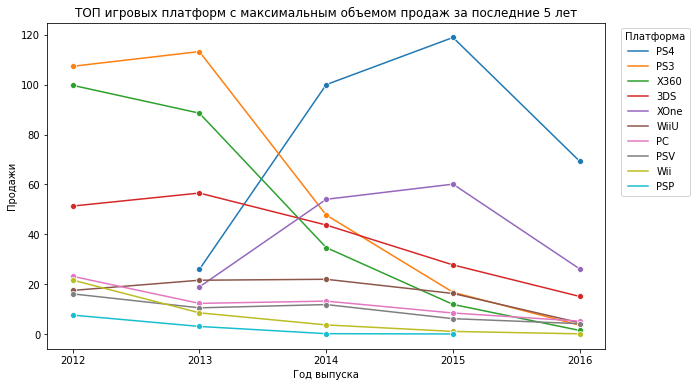

In [25]:
#Получение данных за последние 5 года
current_year = data['year_of_release'].max()
years_x = data[data['year_of_release'] >= current_year - 4]

#Получение топ-10 платформ
top_platforms = years_x['platform'].value_counts().head(10).index
top_platforms_data = years_x[years_x['platform'].isin(top_platforms)]

#Группировка данных по годам и платформам
sales_by_year = top_platforms_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

#Подготовка порядка платформ для легенды
order = top_platforms_data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).index
sales_by_year['platform'] = pd.Categorical(sales_by_year['platform'], categories=order, ordered=True)
sales_by_year_sorted = sales_by_year.sort_values(by=['platform', 'year_of_release'])

#Построение графика
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_by_year_sorted, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.title('ТОП игровых платформ с максимальным объемом продаж за последние 5 лет')
plt.legend(title='Платформа', loc='upper left', bbox_to_anchor=(1.02, 1.0))
plt.xticks(np.arange(sales_by_year_sorted['year_of_release'].min(), sales_by_year_sorted['year_of_release'].max() + 1, 1))
plt.show()

In [26]:
top_of_2012 = top_platforms_years(data, 2012)
print("Объем продаж начиная с 2014 года:\n", top_of_2012)

Объем продаж начиная с 2014 года:

 platform

PS4     314.14

PS3     288.78

X360    236.54

3DS     194.61

XOne    159.32

WiiU     82.19

PC       62.65

PSV      49.18

Wii      35.37

DS       12.55

Name: total_sales, dtype: float64


Анализируя данные за последние 5 лет, мы видим, что продажи у некоторых платформ немного выросли в течение этого периода. Однако, к концу 2016 года наблюдается общий тренд падения продаж у всех платформ в топ-10. Учитывая это, для дальнейших исследований мы сосредоточимся на данных за последние 3 года.

В результате анализа за последние 3 года мы выделяем несколько потенциально прибыльных платформ: PS4, XOne и 3DS. Эти платформы являются наиболее продаваемыми среди доступных в данном трехлетнем интервале.

**4. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

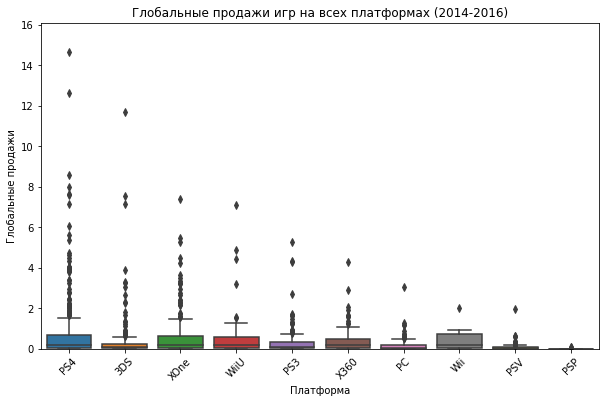

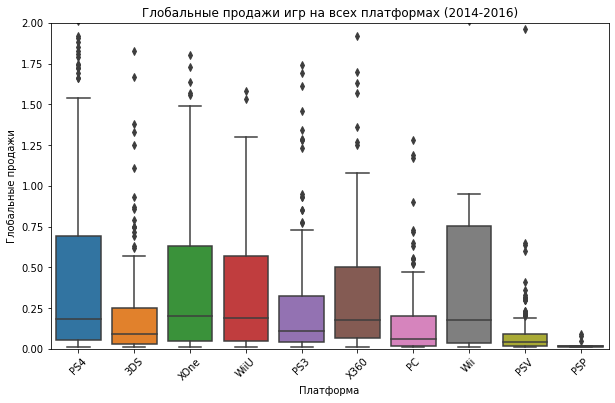

In [27]:
#Получение данных для всех платформ за актуальный период
data_filtered = data[data['year_of_release'] >= 2014]

#Построение диаграммы размаха для глобальных продаж игр на всех платформах
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=data_filtered)
plt.title('Глобальные продажи игр на всех платформах (2014-2016)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.ylim(0, data_filtered['total_sales'].max() * 1.1)  # Масштабирование оси y
plt.xticks(rotation=45)
plt.show()

#Построение масштабированной диаграммы размаха для глобальных продаж игр на всех платформах
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=data_filtered)
plt.title('Глобальные продажи игр на всех платформах (2014-2016)')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи')
plt.ylim(0, 2)  # Ограничение оси y для лучшей видимости крупных боксплотов
plt.xticks(rotation=45)
plt.show()

В результате исследования платформ в интервале 2014-2016 годов было выявлено, что топ-3 прибыльных платформами являются PS4, XOne и 3DS.

Медианные значения продаж для PS4 и XOne примерно одинаковы и составляют около 0,2 млн. Это на 0,1 млн больше, чем у платформы 3DS.

Границы выбросов для PS4 и XOne значительно выше, чем для 3DS, составляя 1,75 млн и 1,6 млн соответственно. Это указывает на более значительные объемы продаж и потенциальную конкурентоспособность PS4 и XOne на рынке.

Таким образом, на рынке игровых платформ в период 2014-2016 годов основными конкурентами были PS4 и XOne, которые продемонстрировали высокие объемы продаж и потенциал для прибыльности. Платформа 3DS также имела свою долю рынка, но с более скромными продажами.

**5.Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

**Соотнесите выводы с продажами игр на других платформах.**

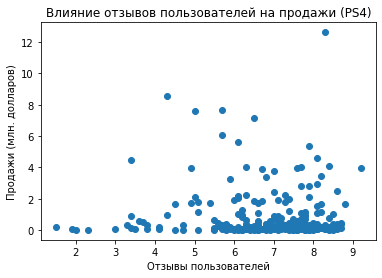

Корреляция между отзывами пользователей и продажами (PS4): -0.040131589472697356


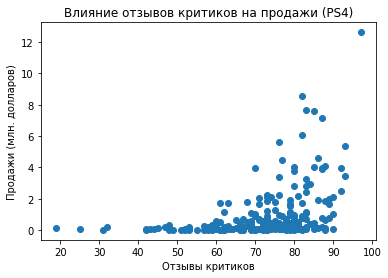

Корреляция между отзывами критиков и продажами (PS4): 0.40266141068104083


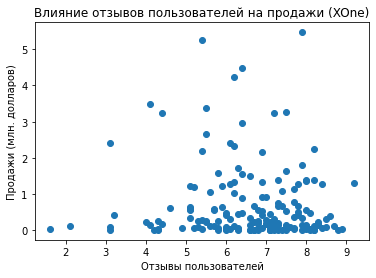

Корреляция между отзывами пользователей и продажами (XOne): -0.0703839280647581


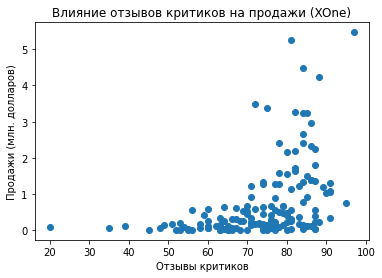

Корреляция между отзывами критиков и продажами (XOne): 0.42867694370333226


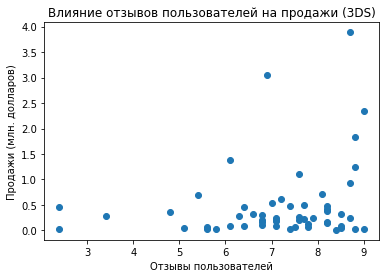

Корреляция между отзывами пользователей и продажами (3DS): 0.2151932718527028


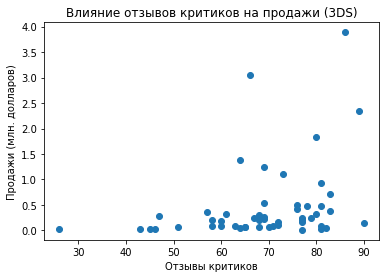

Корреляция между отзывами критиков и продажами (3DS): 0.314117492869051


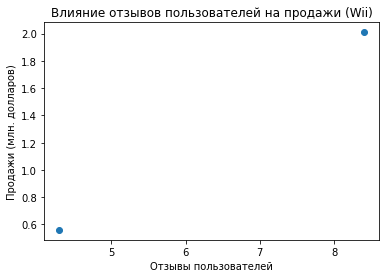

Корреляция между отзывами пользователей и продажами (Wii): 1.0


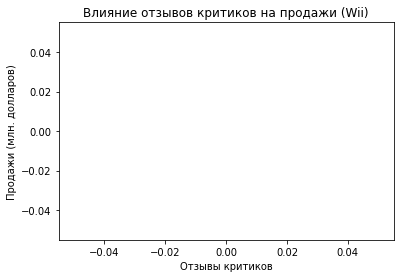

Корреляция между отзывами критиков и продажами (Wii): nan


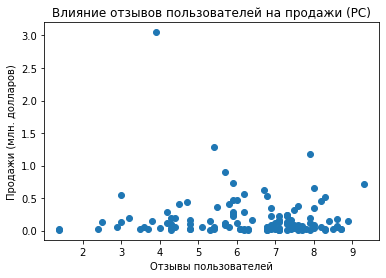

Корреляция между отзывами пользователей и продажами (PC): -0.07159665703472451


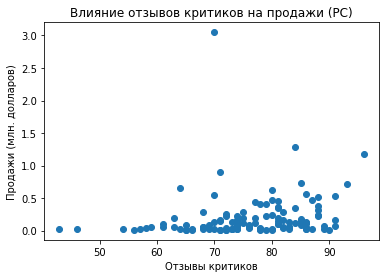

Корреляция между отзывами критиков и продажами (PC): 0.17463413769350036


In [30]:
platforms = ['PS4', 'XOne', '3DS', 'Wii', 'PC']
platform_data = data[(data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016) & (data['platform'].isin(platforms))]
platform_data = platform_data.dropna(subset=['total_sales'])

for platform in platforms:
    platform_subset = platform_data[platform_data['platform'] == platform]
    
    platform_user = platform_subset[(platform_subset['user_score'] != 100)]
    platform_critic = platform_subset[platform_subset['critic_score'] != -1]

    plt.figure(figsize=(6, 4))
    plt.scatter(platform_user['user_score'], platform_user['total_sales'])
    plt.xlabel('Отзывы пользователей')
    plt.ylabel('Продажи (млн. долларов)')
    plt.title(f'Влияние отзывов пользователей на продажи ({platform})')
    plt.show()

    correlation_user = platform_user['user_score'].corr(platform_user['total_sales'])
    print(f"Корреляция между отзывами пользователей и продажами ({platform}): {correlation_user}")

    plt.figure(figsize=(6, 4))
    plt.scatter(platform_critic['critic_score'], platform_critic['total_sales'])
    plt.xlabel('Отзывы критиков')
    plt.ylabel('Продажи (млн. долларов)')
    plt.title(f'Влияние отзывов критиков на продажи ({platform})')
    plt.show()

    correlation_critic = platform_critic['critic_score'].corr(platform_critic['total_sales'])
    print(f"Корреляция между отзывами критиков и продажами ({platform}): {correlation_critic}")


После анализа отношений между пользовательскими отзывами, отзывами критиков и продажами игр на платформах PS4, XOne, 3DS, PC и Wii были получены следующие результаты:

Для платформы PS4 и XOne наблюдается слабая отрицательная связь между пользовательскими отзывами и продажами игр. Это означает, что пользовательские оценки не оказывают значительного влияния на объем продаж игр для этих платформ.

Однако, в случае платформы PS4 мы можем заметить умеренную положительную связь между отзывами критиков и продажами игр. Это говорит о том, что игры, получившие более высокие оценки от критиков, имеют больший потенциал для успешных продаж. Несмотря на это, корреляция не является сильной, и другие факторы также могут влиять на успех игр на этой платформе.

В отношении платформы 3DS, коэффициенты корреляции пользовательских отзывов и отзывов критиков с продажами игр показывают слабую положительную связь. Это может указывать на то, что пользователи этой портативной платформы обращают внимание на отзывы и принимают их во внимание при выборе игр. Однако, в целом, корреляция не сильна, что может указывать на другие факторы, влияющие на продажи игр на этой платформе.

Таким образом, на основании анализа корреляции между отзывами пользователей, отзывами критиков и продажами игр на платформах PS4, XOne, Wii, PC и 3DS, можно сделать вывод, что влияние отзывов на объем продаж игр может различаться в зависимости от платформы.

**6. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

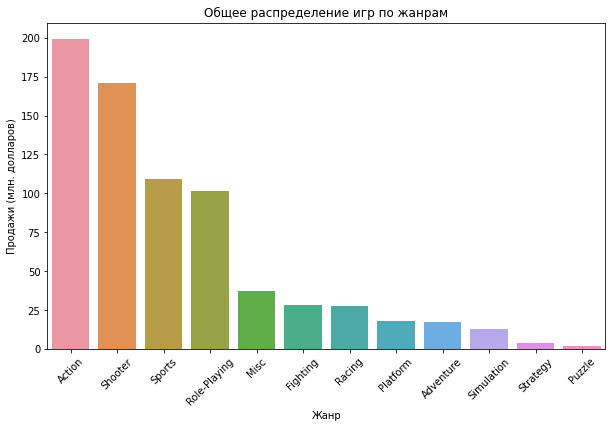

In [31]:
sale = data[(data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)].groupby('genre')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sale.index, y=sale.values)
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн. долларов)')
plt.title('Общее распределение игр по жанрам')
plt.xticks(rotation=45)
plt.show()

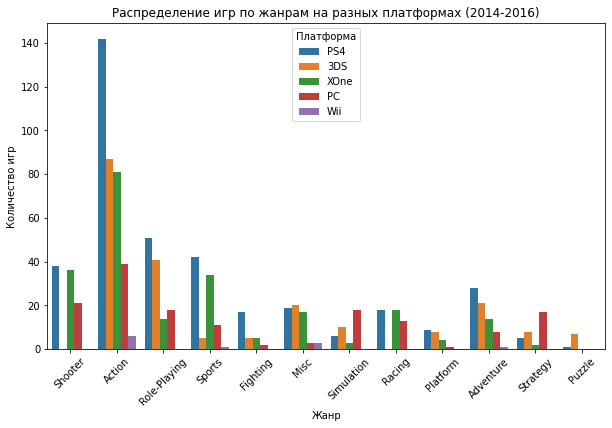

In [32]:
platforms = ['PS4', 'XOne', '3DS', 'PC', 'Wii']
platform_data = data[(data['platform'].isin(platforms)) & (data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]

plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=platform_data, hue='platform')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.title('Распределение игр по жанрам на разных платформах (2014-2016)')
plt.xticks(rotation=45)
plt.legend(title='Платформа')
plt.show()

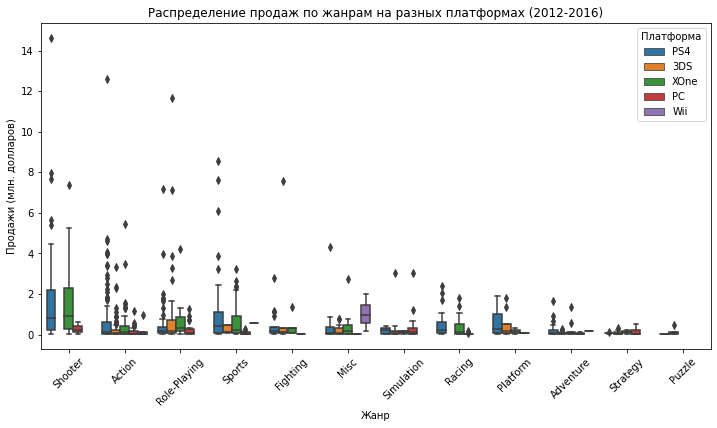

In [33]:
platforms = ['PS4', 'XOne', '3DS', 'PC', 'Wii']
platform_data = data[(data['platform'].isin(platforms)) & (data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='total_sales', data=platform_data, hue='platform')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн. долларов)')
plt.title('Распределение продаж по жанрам на разных платформах (2012-2016)')
plt.xticks(rotation=45)
plt.legend(title='Платформа')
plt.show()

После анализа данных о продажах игр на платформах PS4, XOne, 3DS, PC и Wii в период с 2014 по 2016 годы, можно сделать следующие выводы:

Самые прибыльные жанры:
1. Action
2. Shooter
3. Sports

Менее прибыльные:
1. Puzzle
2. Strategy

# 4. Составляются портреты пользователей каждого региона:

**1. Определите для пользователя каждого региона (NA, EU, JP):**
Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [34]:
#Создаем data_for_analyze с периодом с 2014 по 2016 г.
data_for_analyze = data[(data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]

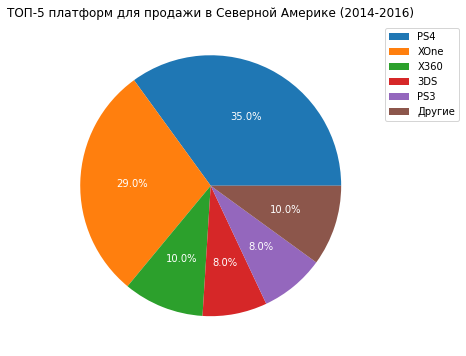

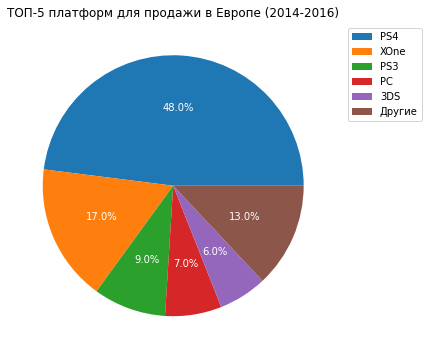

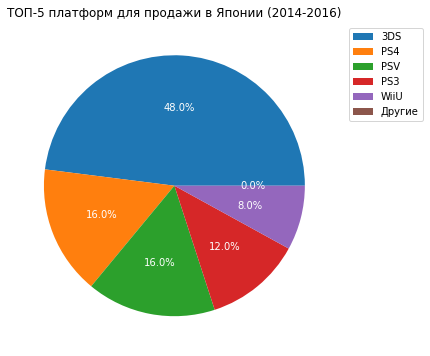

In [35]:
def plot_pie(sales, name):
    platform = data_for_analyze.groupby('platform')[sales].sum().sort_values(ascending=False)
    top = (platform.head(5) / platform.sum()).round(2)
    other = 1 - top.sum()
    top['Другие'] = other
    
    plt.figure(figsize=(10, 6))
    ax = top.plot(kind='pie', autopct='%1.1f%%', textprops=dict(color="w", fontsize=10), normalize=True)
    ax.set_title(f'ТОП-5 платформ для продажи в {name} (2014-2016)', fontsize=12)
    ax.set_ylabel('')
    plt.legend(top.index, loc='upper left', bbox_to_anchor=(1.02, 1.0))
    plt.show()

plot_pie('na_sales', 'Северной Америке')
plot_pie('eu_sales', 'Европе')
plot_pie('jp_sales', 'Японии')

В Северной Америке и Европе платформы PS4 и XOne пользуются большой популярностью, при этом PS4 доминирует на рынке с долей продаж около 35% и 48% соответственно. Платформы X360 и PS3 начинают уступать свои позиции и занимают менее 10% рынка. Портативная платформа 3DS от Nintendo занимает особую нишу, особенно на японском рынке.

В Японии ситуация отличается от Запада: здесь наибольшую долю рынка занимают портативные игровые системы и консоли от японских производителей. 3DS занимает лидирующую позицию, охватывая около 48% рынка. За ним следуют PS4 и PSV с долей рынка порядка 16% каждая.

В Европе PC-игры имеют значительную долю рынка (около 7%), так как PC-гейминг популярен на этом континенте. В Северной Америке и Японии этот показатель намного ниже и не входит в топ-5 платформ по продажам.

Таким образом, можно сделать вывод о различиях в предпочтениях и предпочитаемых платформах в разных регионах.

**2. Самые популярные жанры (топ-5). Поясните разницу.**

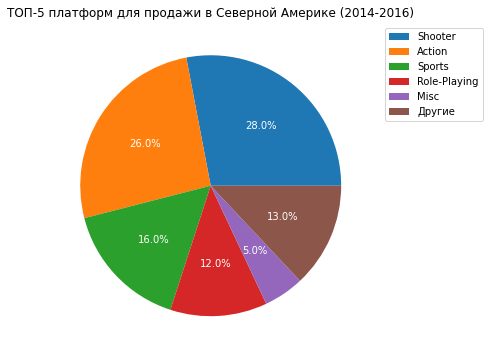

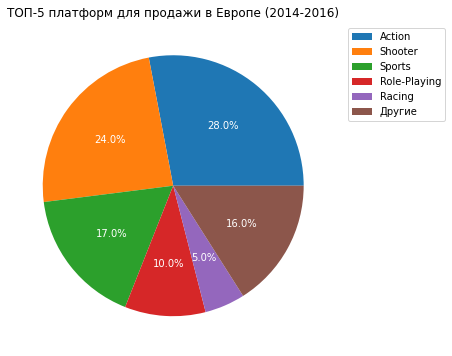

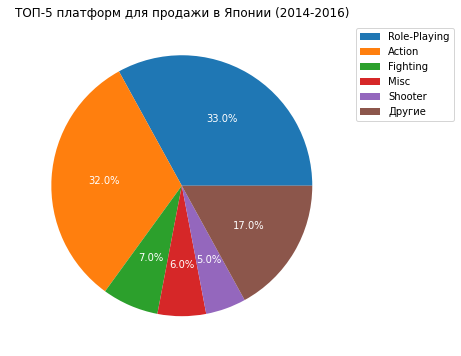

In [36]:
def plot_pie(sales, name):
    platform = data_for_analyze.groupby('genre')[sales].sum().sort_values(ascending=False)
    top = (platform.head(5) / platform.sum()).round(2)
    other = 1 - top.sum()
    top['Другие'] = other
    
    plt.figure(figsize=(10, 6))
    ax = top.plot(kind='pie', autopct='%1.1f%%', textprops=dict(color="w", fontsize=10), normalize=True)
    ax.set_title(f'ТОП-5 платформ для продажи в {name} (2014-2016)', fontsize=12)
    ax.set_ylabel('')
    plt.legend(top.index, loc='upper left', bbox_to_anchor=(1.02, 1.0))
    plt.show()

plot_pie('na_sales', 'Северной Америке')
plot_pie('eu_sales', 'Европе')
plot_pie('jp_sales', 'Японии')

В Северной Америке и Европе жанры shooter и action являются наиболее популярными. Это указывает на значительный интерес пользователей этих регионов к играм с динамичным геймплеем, стрельбой и приключениями.

В Японии ситуация совершенно отличается: здесь наиболее популярными являются ролевые игры и action, причем доля рынка, которую они занимают, значительно выше, чем в Северной Америке и Европе. Это свидетельствует о сильном предпочтении японских игроков к игровым жанрам с акцентом на сюжет и развитие персонажей.

Анализируя данные выше, можно сделать вывод о различиях в предпочтениях игроков в разных регионах. Игровые рынки Северной Америки и Европы ориентированы на экшн-игры, в то время как в Японии большую популярность имеют ролевые игры и action. Эти различия могут быть обусловлены культурными и историческими особенностями каждого региона, а также предпочтениями и вкусами игроков.

**3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

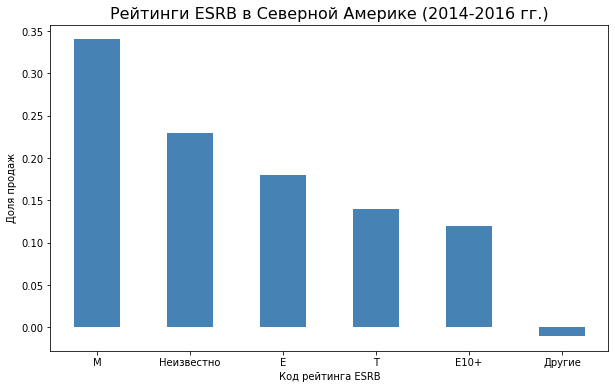

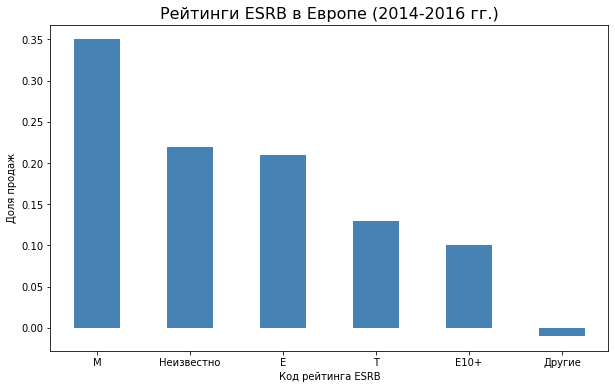

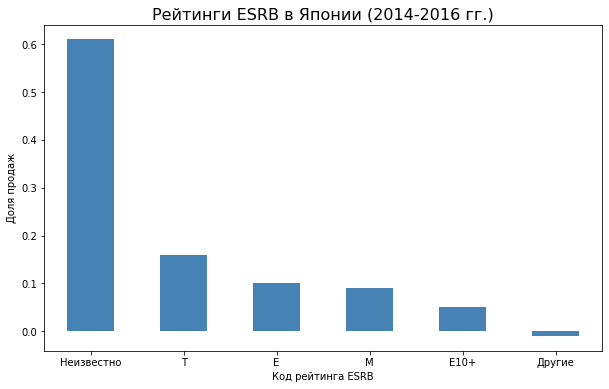

In [37]:
def bar_for_erb(sales, name):
    data_for_analyze_n = data_for_analyze.copy()
    data_for_analyze_n['rating'] = data_for_analyze_n['rating'].fillna('Неизвестно')
    sale = data_for_analyze_n.groupby('rating')[sales].sum().sort_values(ascending=False)
    top = (sale.head(5) / sale.sum()).round(2)
    other = 1 - top.sum()
    top['Другие'] = other

    plt.figure(figsize=(10, 6))
    ax = top.plot(kind='bar', color='steelblue')
    ax.set_title(f'Рейтинги ESRB в {name} (2014-2016 гг.)', fontsize=16)
    ax.set_xlabel('Код рейтинга ESRB')
    ax.set_ylabel('Доля продаж')
    plt.xticks(rotation=0)
    plt.show()

bar_for_erb('na_sales', 'Северной Америке')
bar_for_erb('eu_sales', 'Европе')
bar_for_erb('jp_sales', 'Японии')

In [38]:
# Комментарий ревьюера
temp = data_for_analyze.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

749 0.443457667258733


T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

В Северной Америке:

Самыми популярными играми являются те, которые имеют рейтинг "M" («Для взрослых»), за которыми следуют игры с рейтингом "E" («Для всех») и "E10+" («Для всех от 10 лет и старше»).
Игры без указанного рейтинга составляют значительную долю продаж, что может быть связано с отсутствием маркировки ESRB для некоторых игр.
Игры с рейтингом "EC" («Для детей младшего возраста») имеют наименьшую долю продаж.

В Европе:

Самыми популярными играми также являются игры с рейтингом "M" («Для взрослых»), за которыми следуют игры с рейтингом "E" («Для всех») и "16+" («16 лет и старше»).
Как и в Северной Америке, игры без указанного рейтинга составляют значительную долю продаж.
Игры с рейтингом "EC" («Для детей младшего возраста») имеют наименьшую долю продаж.

В Японии:

В отличие от Северной Америки и Европы, в Японии наибольшие продажи приходятся на игры с рейтингом "E" («Для всех»), за которыми следуют игры с рейтингом "T" («Подросткам») и "C" («Для детей»).
В Японии также заметно меньшее количество игр без указанного рейтинга.
Игры с рейтингом "M" («Для взрослых») имеют наименьшую долю продаж.
Общий вывод:
В разных регионах наблюдаются различия в предпочтениях игроков по рейтингу ESRB. В Северной Америке и Европе наибольшую популярность имеют игры для взрослых (рейтинг "M"), в то время как в Японии больше предпочтение

# 5.  Проверка гипотез

**1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?**

**H0:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**H1:** Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [39]:
xbox = data_for_analyze[(data_for_analyze['platform'] == 'XOne') & (data_for_analyze['user_score'].notna()) & (data_for_analyze['user_score'] != 100)]['user_score']
pc = data_for_analyze[(data_for_analyze['platform'] == 'PC') & (data_for_analyze['user_score'].notna()) & (data_for_analyze['user_score'] != 100)]['user_score']

alpha = 0.05

results = st.ttest_ind(xbox, pc)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Нулевая гипотеза отвергнута: Средние пользовательские рейтинги платформ Xbox One и PC разные.")
else:
    print("Нулевая гипотеза не может быть отвергнута: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.")

p-value: 0.10450507919348415

Нулевая гипотеза не может быть отвергнута: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


Для проверки этой гипотезы был применен критерий Стьюдента (t-тест для независимых выборок). В данном случае у нас две независимые выборки, которые представляют рейтинги пользователей для платформ Xbox One и PC. Мы хотим определить, есть ли статистически значимая разница между средними значениями этих двух выборок.

Исходя из результатов проведенного статистического теста Стьюдента, мы не обладаем достаточными доказательствами для отвержения нулевой гипотезы о равенстве средних пользовательских рейтингов платформ Xbox One и PC. То есть, на основании имеющихся данных, мы не можем сделать вывод о наличии статистически значимой разницы в пользовательских рейтингах между этими двумя платформами.

Следовательно, гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы, не может быть отклонена.

**H0:** Средние пользовательские рейтинги жанров action и sports одинаковые.

**H1:** Средние пользовательские рейтинги жанров action и sports разные.

In [41]:
action_rating = data_for_analyze[(data_for_analyze['genre'] == 'Action') & (data_for_analyze['user_score'].notna()) & (data_for_analyze['user_score'] != 100)]['user_score']
sports_rating = data_for_analyze[(data_for_analyze['genre'] == 'Sports') & (data_for_analyze['user_score'].notna()) & (data_for_analyze['user_score'] != 100)]['user_score']

alpha = 0.05

results = st.ttest_ind(action_rating, sports_rating)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Нулевая гипотеза отвергнута: Средние пользовательские рейтинги жанров action и sports разные.")
else:
    print("Нулевая гипотеза не может быть отвергнута: Средние пользовательские рейтинги жанров action и sports одинаковые.")

p-value: 2.8711147985105864e-19

Нулевая гипотеза отвергнута: Средние пользовательские рейтинги жанров action и sports разные.


Для проверки этой гипотезы был применен критерий Стьюдента (t-тест для независимых выборок), так как у нас две независимые выборки (рейтинги жанров action и sports) и мы хотим определить, есть ли статистически значимая разница между их средними значениями.

На основании проведенного статистического теста Стьюдента мы имеем достаточные доказательства для отвержения нулевой гипотезы о равенстве средних пользовательских рейтингов жанров Action и Sports. То есть, на основе имеющихся данных, мы можем сделать вывод о наличии статистически значимой разницы в пользовательских рейтингах между этими двумя жанрами.

Таким образом, мы принимаем альтернативную гипотезу: средние пользовательские рейтинги жанров Action и Sports различаются. Это указывает на то, что пользователи оценивают эти жанры по-разному на основе имеющихся данных.

# 6. Общий вывод

**1. Платформы:** Исходя из анализа рынка в разных регионах, рекомендуется выбрать две платформы, которые пользуются наибольшей популярностью в целевых регионах. Например, для Северной Америки и Европы это могут быть PS4 и XOne, а для Японии - 3DS и PS4. Это позволит охватить широкую аудиторию и максимизировать потенциальные продажи.

**2. Жанры:** Учитывая предпочтения регионов, стоит обратить внимание на популярные жанры, такие как action, sports, shooter, misc и role-playing. Игры в этих жанрах обычно имеют большую спрос и потенциал для коммерческого успеха.

**3. Рейтинг ESRB:** Исследование показывает, что рейтинг ESRB влияет на продажи в регионе. Следует учесть распределение рейтингов ESRB в каждом регионе и выбрать игры с соответствующим рейтингом, который наиболее популярен в целевом регионе.

**4. Регионы:** Ориентируйтесь на регионы, где ожидается наибольший спрос. Например, в Северной Америке и Европе игры для взрослых пользуются большим успехом, в то время как в Японии предпочтение отдается играм для подростков.

**5. Отзывы:** Отзывы пользователей могут быть полезным индикатором качества и интереса к игре. Рекомендуется учитывать положительные отзывы и высокие оценки критиков, так как это может положительно влиять на продажи.

**6. Проверка гипотез:**
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза подтвердилась.
2. Средние пользовательские рейтинги жанров Action и Sports разные. Гипотеза подтвердилась.


Учитывая эти факторы, рекомендуется выбрать игры с популярными платформами, популярными жанрами, соответствующим рейтингом ESRB и ориентироваться на целевые регионы. Приоритет следует отдавать играм, которые имеют хорошие отзывы и оценки критиков, так как это может увеличить вероятность коммерческого успеха и эффективности рекламного бюджета.

